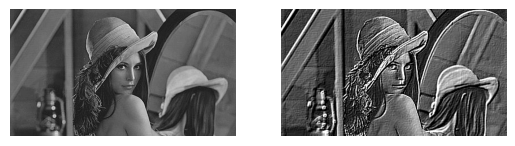

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Task 1:
img = cv2.imread('../Practice-Images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def embossFilter(img):
    _img = img.copy()

    kernelEmboss = np.array\
    ([[-2,-1,0],
      [-1,1,1],
      [0,1,2]])

    _img = cv2.filter2D(img, -1, kernelEmboss)
    return _img

img_embossed = embossFilter(cv2Gray)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2Gray, cmap='gray')
axarr[1].imshow(img_embossed, cmap='gray')

axarr[0].axis('off')
axarr[1].axis('off')

plt.imshow(img_embossed, cmap='gray')
plt.show()